<a href="https://colab.research.google.com/github/jeraldflowers/Customer-Segmentation-Clustering/blob/main/Final_project_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Personality Analysis
Analysis of company's ideal customers

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

## Data Load

In [5]:
df_customer = pd.read_csv('/content/marketing_campaign.csv', sep="\t")

In [6]:
df_customer.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Handling Null Values

In [8]:
df_customer.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We notice that in the "income" variable there are null values that we will proceed to eliminate.

In [9]:
df_customer.dropna(inplace=True)

In [10]:
df_customer.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Validating Duplicates

In [11]:
df_customer[df_customer.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


We see that there are no duplicate elements.

## Data Cleaning

### First Step
We are going to create a function from "Dt_Customer" that indicates the number of days that a customer is registered in the company's database. However, for simplicity, I take this value relative to the most recent customer on record. To get the values I have to check the newest and oldest recorded dates.

In [15]:
df_customer["Dt_Customer"] = pd.to_datetime(df_customer["Dt_Customer"])
dates = []
for i in df_customer["Dt_Customer"]:
  i = i.date()
  dates.append(i)

print(max(dates))
print(min(dates))

2014-12-06
2012-01-08


We created a feature ("Customer_for") with the number of days customers started shopping in the store relative to the last recorded date.

In [16]:
days = []
d1 = max(dates)
for i in dates:
  delta = d1 - i
  days.append(delta)

df_customer["Customer_for"] = days
df_customer["Customer_for"] = pd.to_numeric(df_customer["Customer_for"], errors="coerce")

Let's explore unique values in categorical features to get a better idea of the data.

In [17]:
print(df_customer["Marital_Status"].value_counts(), "\n")
print(df_customer["Education"].value_counts())

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


### Second Step

We designed some new features:

In [18]:
#Age of customer today 
df_customer["Age"] = 2022 - df_customer["Year_Birth"]

#Total spendings on various items
df_customer["Spent"] = df_customer["MntWines"] + df_customer["MntFruits"] + df_customer["MntMeatProducts"] + df_customer["MntFishProducts"] + df_customer["MntSweetProducts"] + df_customer["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df_customer["Living_With"] = df_customer["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df_customer["Children"] = df_customer["Kidhome"] + df_customer["Teenhome"]

#Feature for total members in the householde
df_customer["Family_Size"] = df_customer["Living_With"].replace({"Alone": 1, "Partner":2}) + df_customer["Children"]

#Feature pertaining parenthood
df_customer["Is_Parent"] = np.where(df_customer.Children> 0, 1, 0)

#Segmenting education levels in three groups
df_customer["Education"]= df_customer["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df_customer = df_customer.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df_customer = df_customer.drop(to_drop, axis=1)

In [20]:
df_customer.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_for,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,53.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,45.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,52.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,63.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,129.000000,2525.000000,3.000000,5.000000,1.000000


The above statistics show some discrepancies in median income and age, and maximum income and age.

We know the maximum age is 129 years since I calculated how old it would be today (ie 2022) and the data is old.

We will visualize the data. I will graph some of the selected features.

<Figure size 432x288 with 0 Axes>

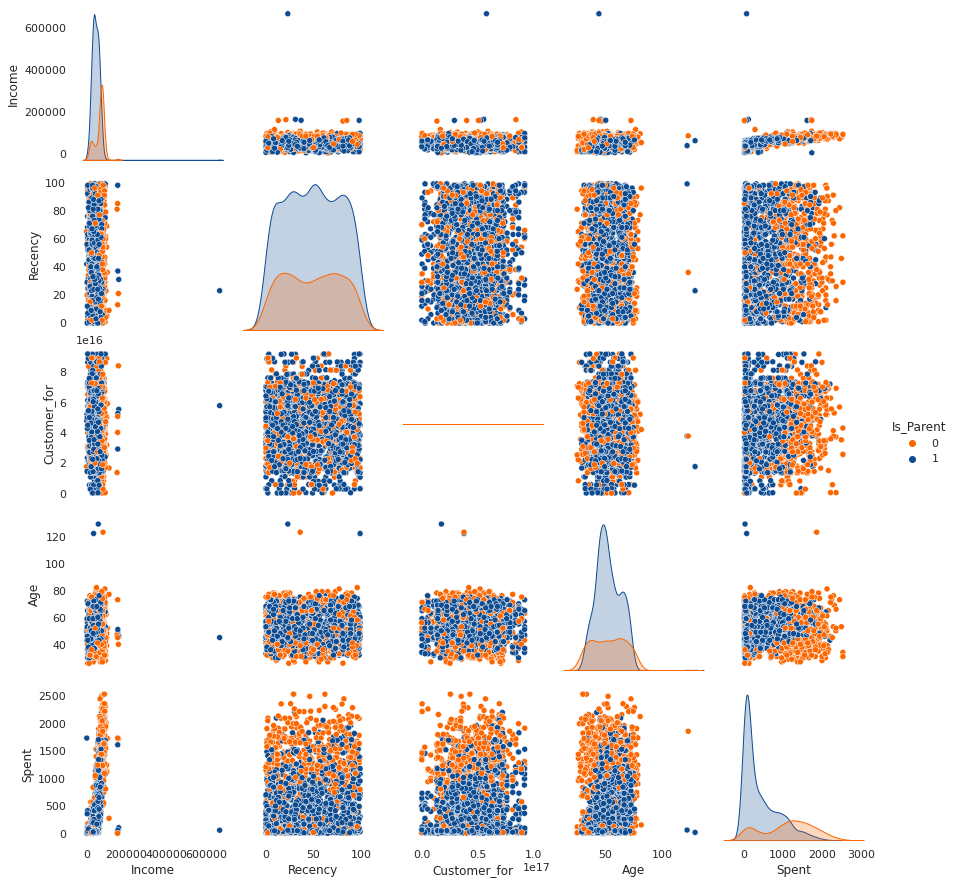

In [29]:
from matplotlib import colors

sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
To_Plot = [ "Income", "Recency", "Customer_for", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(df_customer[To_Plot], hue= "Is_Parent",palette= (["#FC6600","#0E4C92"]))

plt.show()

We note that there are some outliers in the income and age characteristics. We remove these outliers.

In [30]:
df_customer = df_customer[(df_customer["Age"]<90)]
df_customer = df_customer[(df_customer["Income"]<600000)]
print(len(df_customer))

2212


We see that the new number of data-points after removing the outliers is 2212

Now let's look at the correlation between the features. (Excluding categorical attributes at this point).

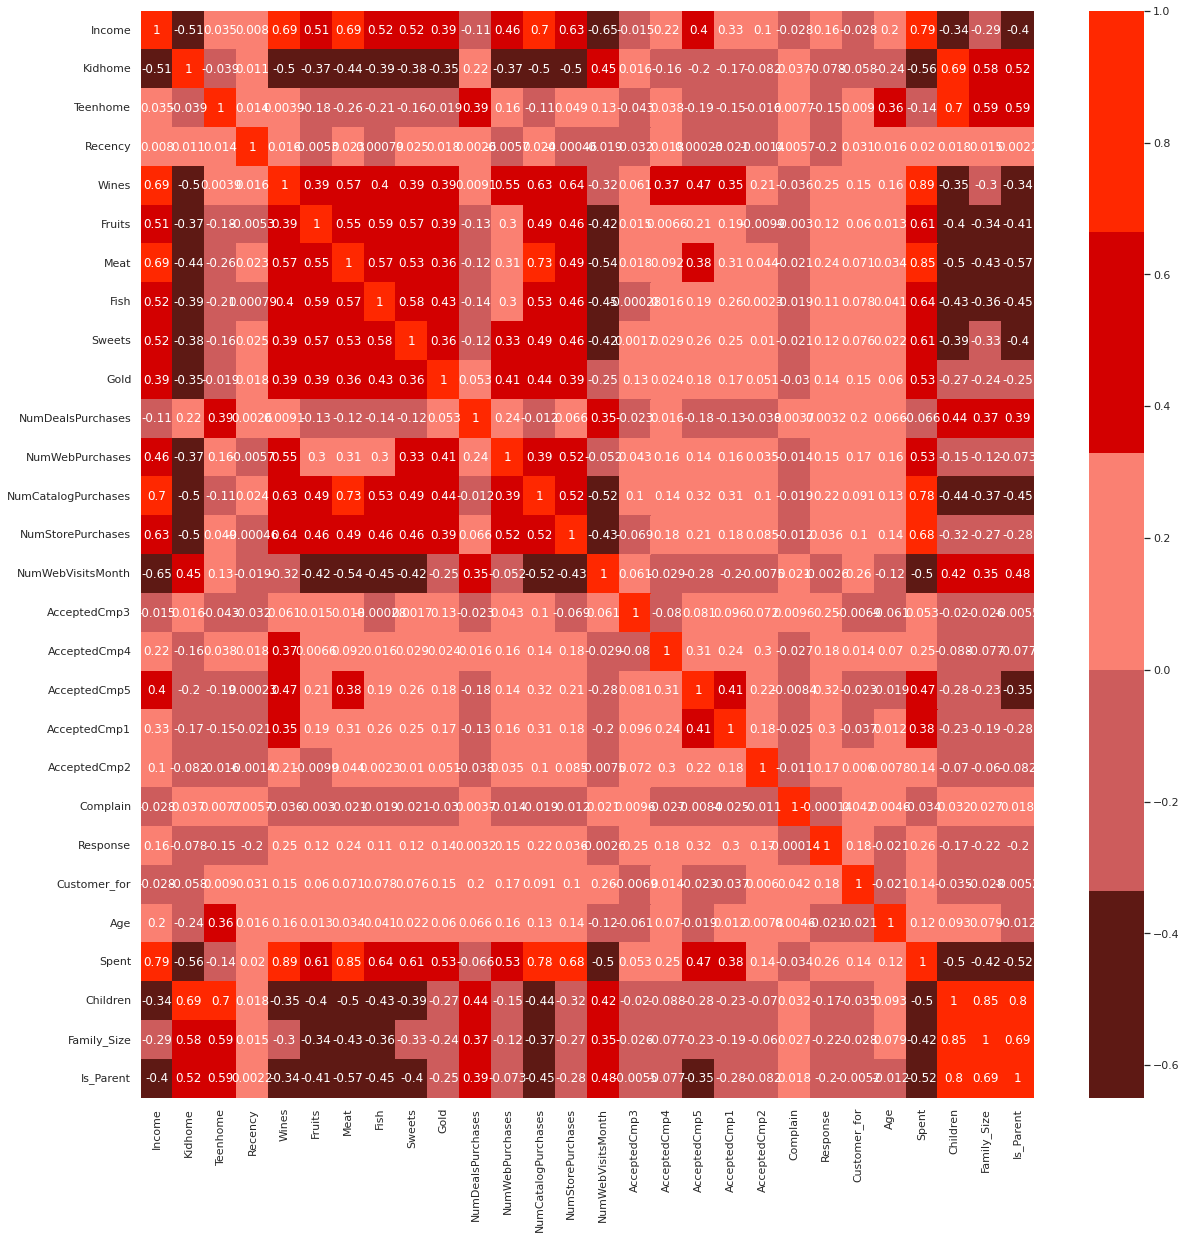

In [35]:
pallete = ["#BF0A30","#5E1914","#CD5C5C","#FA8072","#D30000","#FF2800"]
cmap = colors.ListedColormap(pallete)

corrmat = df_customer.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

The data is pretty clean and the new features have been included.

## Data Preprocessing

Get list of categorical variables.

In [36]:
s = (df_customer.dtypes == 'object')
object_cols = list(s[s].index)

print(object_cols)

['Education', 'Living_With']


Label Encoding the object dtypes.

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in object_cols:
    df_customer[i]=df_customer[[i]].apply(le.fit_transform)

Creating a copy of data.

In [38]:
ds_data = df_customer.copy()

Creating a subset of dataframe by dropping the features on deals accepted and promotions

In [39]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds_data = ds_data.drop(cols_del, axis=1)

#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(ds_data)
scaled_ds = pd.DataFrame(scaler.transform(ds_data), columns= ds_data.columns )

Scaled data to be used for reducing the dimensionality.

In [40]:
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_for,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


## Dimensionality Reduction with PCA

In [41]:
from sklearn.decomposition import PCA

Initiating PCA to reduce dimentions aka features to 3.

In [42]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,2.826752e-16,2.878377,-5.969395,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,3.854662e-17,1.706839,-4.312181,-1.328340,-0.158181,1.242304,6.142766
col3,2212.0,4.015273e-17,1.221956,-3.529543,-0.828994,-0.021496,0.799789,6.614415


A 3D Projection Of Data In The Reduced Dimension.

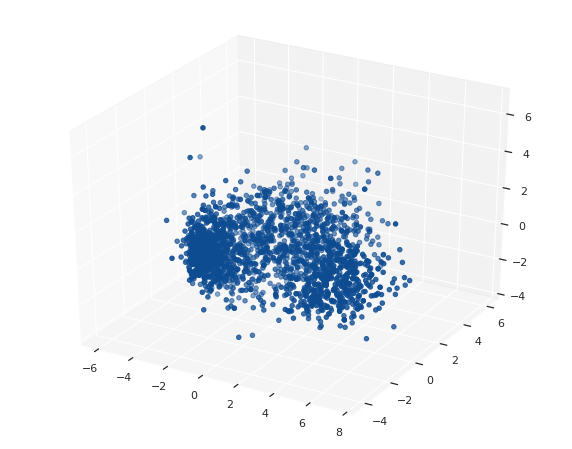

In [47]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="#0E4C92", marker="o" )
plt.show()

## Clustering

In [48]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Quick examination of elbow method to find numbers of clusters to make.


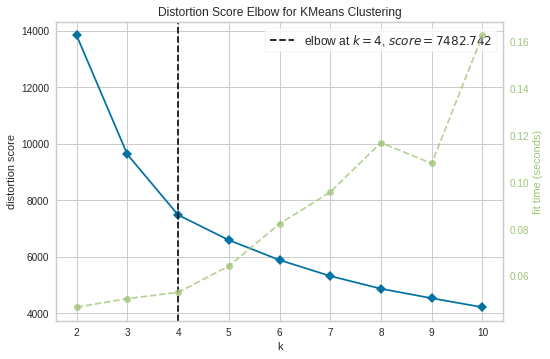

In [49]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

We see that four will be an optimal number of groups for these data. Next, we will fit the agglomerative clustering model to obtain the final clusters.

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
df_customer["Clusters"]= yhat_AC

To examine the clusters formed, let's take a look at the three-dimensional distribution of the clusters.

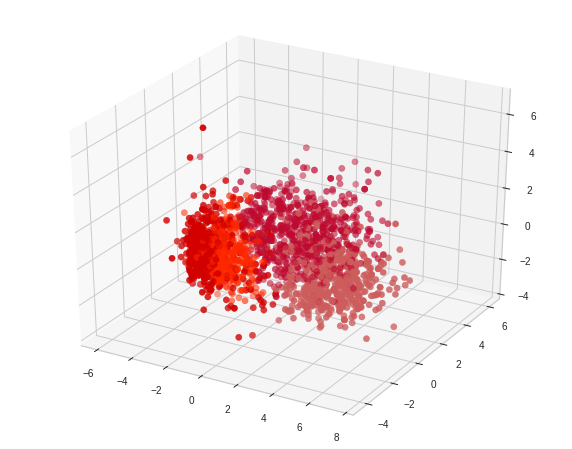

In [52]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
plt.show()

This is the plot of the Clusters.

## Evaluating Models

First, let's take a look at the group distribution of the pool.

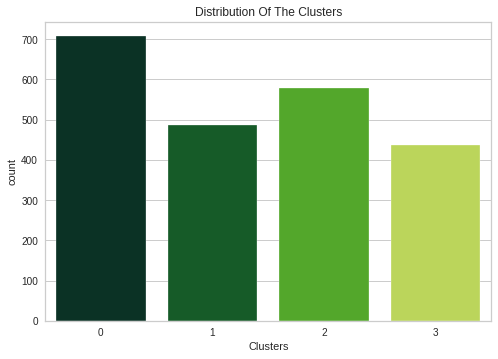

In [53]:
pal = ["#043927","#0B6623","#4CBB17","#C7EA46"]
pl = sns.countplot(x=df_customer["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The groups seem to be quite spread out.

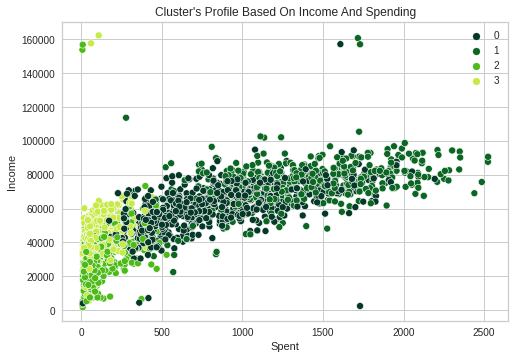

In [54]:
pl = sns.scatterplot(data = df_customer,x=df_customer["Spent"], y=df_customer["Income"],hue=df_customer["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### Income vs Spending plot shows the clusters pattern

- group 0: high spending & average income
- group 1: high spending & high income
- group 2: low spending & low income
- group 3: high spending & low income

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


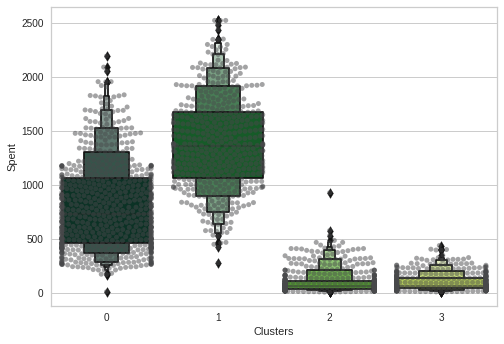

In [57]:
plt.figure()
pl=sns.swarmplot(x=df_customer["Clusters"], y=df_customer["Spent"], color= "#48494B", alpha=0.5 )
pl=sns.boxenplot(x=df_customer["Clusters"], y=df_customer["Spent"], palette=pal)
plt.show()

From the graph above, it can be clearly seen that group 1 is our largest set of customers, closely followed by group 0. We can explore what each group spends on for targeted marketing strategies.

Let's explore how our campaigns have fared in the past.

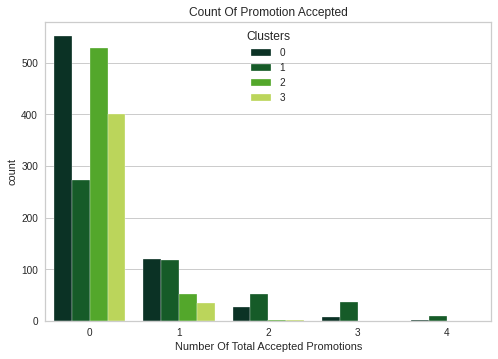

In [58]:
df_customer["Total_Promos"] = df_customer["AcceptedCmp1"] + df_customer["AcceptedCmp2"] + df_customer["AcceptedCmp3"] + df_customer["AcceptedCmp4"] + df_customer["AcceptedCmp5"]

plt.figure()
pl = sns.countplot(x=df_customer["Total_Promos"], hue=df_customer["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There hasn't been an overwhelming response to the campaigns so far. Very few participants in general. Also, no one takes part in all 5 of them. Perhaps better targeted and well planned campaigns are required to drive sales.

### Plotting the number of deals purchased

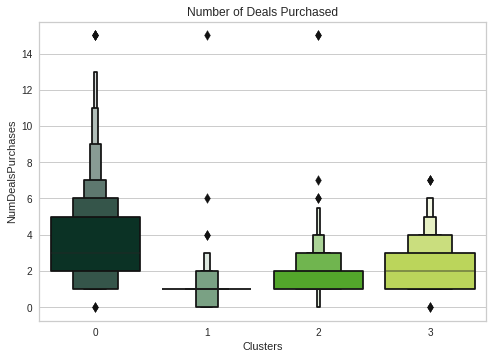

In [60]:
plt.figure()
pl=sns.boxenplot(y=df_customer["NumDealsPurchases"],x=df_customer["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike the campaigns, the offers offered performed well. You have the best result with group 0 and group 3. However, our star customer group 1 is not very interested in the offers. Nothing seems to overwhelmingly attract group 2.

## Conclusion
In this project, unsupervised clustering was performed. Using dimensionality reduction followed by agglomerative clustering. 4 groups were used to profile clients according to their family structures and income/expenses. This can be used in planning better marketing strategies.